# Importing Data

In [1]:
#Importing tools + data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
kc_df = pd.read_csv('kc_house_data.csv')
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Cleaning Data

## Initial Exploration

In [4]:
kc_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
#waterfront, yr_renovated and view potentially missing data
#date column is saved as an object, may need to convert

#Target: 

#Continuous features: lat , long , sqft_above , sqft_basement , sqft_living , sqft_living15 , 
#                     sqrt_lot , sqrt_lot15 , yr_built , yr_renovated

#Categorical features: bathrooms , bedrooms , condition , floors , grade , view , waterfront , zipcode

#Drop: ID (not relevant for this analysis)

#Date: potentially convert into year

## Dealing with null values

In [7]:
#Explore N/A values

kc_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Waterfront

In [8]:
#Resolving N/A in waterfront

In [9]:
kc_df['waterfront'].unique()

array([nan,  0.,  1.])

In [10]:
#replacing with the median of 0

kc_df['waterfront'] = kc_df['waterfront'].fillna(0.)
kc_df['waterfront'].unique()

array([0., 1.])

### View

In [11]:
#Resolving N/A in view

In [12]:
kc_df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [13]:
#replacing with the median of 0

kc_df['view'] = kc_df['view'].fillna(0.)
kc_df['view'].unique()

array([0., 3., 4., 2., 1.])

### Year Renovated

In [14]:
#Resolving N/A in yr_renovated
kc_df['yr_renovated'].unique()

#Going to assume that if the data is NaN, it was never renovated.

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [15]:
kc_df['yr_renovated'] = kc_df['yr_renovated'].fillna(0.)
kc_df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [16]:
#Checking again for N/A values

kc_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Investigating Non-Numerical Data

In [17]:
kc_df.dtypes[kc_df.dtypes == object]

date             object
sqft_basement    object
dtype: object

### Basement

In [18]:
#Let's transform the sq_ft of the basement to a number
#Choosing int64 based on the other sq_ft metrics

#checking that all values can be tranformed to numericals

kc_df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [19]:
#Found '?' in unique values

kc_df[kc_df['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0.0,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [20]:
#Want to assume that '?' means there is no basement. 
#Confirming this assumption by checking that sqft_living is equal to sqft_above (ground)
#Doing this in a new df to avoid altering source data during exploration

basement_check = kc_df[kc_df['sqft_basement'] == '?']
basement_check

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0.0,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [21]:
basement_check[basement_check['sqft_living'] == basement_check['sqft_above']]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
217,1909600046,7/3/2014,445838.0,3,2.50,2250,5692,2.0,0.0,0.0,...,8,2250,?,2000,0.0,98146,47.5133,-122.379,1320,5390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21365,9521100301,5/7/2014,339950.0,2,1.00,820,681,3.0,0.0,0.0,...,8,820,?,2006,0.0,98103,47.6619,-122.352,820,1156
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0.0,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [22]:
#sqft_living is equal to sqft_above in 284 of 454 rows
#Let's assume here that there is no basement

#check the other values

basement_check[basement_check['sqft_living'] != basement_check['sqft_above']]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
115,3626039325,11/21/2014,740500.0,3,3.50,4380,6350,2.0,0.0,0.0,...,8,2780,?,1900,0.0,98117,47.6981,-122.368,1830,6350
309,3204800200,1/8/2015,665000.0,4,2.75,3320,10574,2.0,0.0,0.0,...,8,2220,?,1960,0.0,98056,47.5376,-122.180,2720,8330
384,713500030,7/28/2014,1350000.0,5,3.50,4800,14984,2.0,0.0,2.0,...,11,3480,?,1998,0.0,98006,47.5543,-122.148,4050,19009
508,5113400431,5/8/2014,615000.0,2,1.00,1540,6872,1.0,0.0,0.0,...,7,820,?,1946,0.0,98119,47.6454,-122.373,1420,5538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21000,291310180,6/13/2014,379500.0,3,2.25,1410,1287,2.0,0.0,0.0,...,7,1290,?,2005,0.0,98027,47.5344,-122.068,1490,1435
21109,3438500250,6/23/2014,515000.0,5,3.25,2910,5027,2.0,0.0,0.0,...,8,2040,?,2013,0.0,98106,47.5543,-122.359,2910,5027
21210,3278600680,6/27/2014,235000.0,1,1.50,1170,1456,2.0,0.0,0.0,...,8,1070,?,2007,0.0,98126,47.5493,-122.372,1360,1730
21356,6169901185,5/20/2014,490000.0,5,3.50,4460,2975,3.0,0.0,2.0,...,10,3280,?,2015,0.0,98119,47.6313,-122.370,2490,4231


In [23]:
basement_check.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [24]:
#Narrowing down to other sqft columns and only where sqft_living and sqft_above are not equal

sqft_check = basement_check[['sqft_living','sqft_above','sqft_lot','sqft_basement']]
sqft_check = sqft_check[sqft_check['sqft_living'] != sqft_check['sqft_above']]
sqft_check

,sqft_living,sqft_above,sqft_lot,sqft_basement
112,1540,1160,12600,?
115,4380,2780,6350,?
309,3320,2220,10574,?
384,4800,3480,14984,?
508,1540,820,6872,?
...,...,...,...,...
21000,1410,1290,1287,?
21109,2910,2040,5027,?
21210,1170,1070,1456,?
21356,4460,3280,2975,?


In [25]:
sqft_check[sqft_check['sqft_living'] > sqft_check['sqft_above']]

,sqft_living,sqft_above,sqft_lot,sqft_basement
112,1540,1160,12600,?
115,4380,2780,6350,?
309,3320,2220,10574,?
384,4800,3480,14984,?
508,1540,820,6872,?
...,...,...,...,...
21000,1410,1290,1287,?
21109,2910,2040,5027,?
21210,1170,1070,1456,?
21356,4460,3280,2975,?


In [26]:
#all remaning homes have a sqft_living larger than sqft_above
#assigning the difference to basement

In [27]:
sqft_check['sqft_basement'] = sqft_check['sqft_living'] - sqft_check['sqft_above']
sqft_check

,sqft_living,sqft_above,sqft_lot,sqft_basement
112,1540,1160,12600,380
115,4380,2780,6350,1600
309,3320,2220,10574,1100
384,4800,3480,14984,1320
508,1540,820,6872,720
...,...,...,...,...
21000,1410,1290,1287,120
21109,2910,2040,5027,870
21210,1170,1070,1456,100
21356,4460,3280,2975,1180


In [28]:
sqft_check[sqft_check['sqft_lot'] < sqft_check['sqft_living']]

,sqft_living,sqft_above,sqft_lot,sqft_basement
4783,2060,1400,1850,660
6580,1160,890,982,270
6631,870,800,747,70
7311,1260,1160,895,100
15179,1250,1040,892,210
15655,1140,760,690,380
18429,1400,1110,865,290
20554,1280,1080,1051,200
20702,1590,1060,1431,530
20934,1500,1110,1119,390


In [29]:
#making changes in original df 

#Replacing '?' with 0 where 'sqft_above' = 'sqft_living'

kc_df[(kc_df['sqft_above']==kc_df['sqft_living']) & (kc_df['sqft_basement'] == '?')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
217,1909600046,7/3/2014,445838.0,3,2.50,2250,5692,2.0,0.0,0.0,...,8,2250,?,2000,0.0,98146,47.5133,-122.379,1320,5390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21365,9521100301,5/7/2014,339950.0,2,1.00,820,681,3.0,0.0,0.0,...,8,820,?,2006,0.0,98103,47.6619,-122.352,820,1156
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0.0,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [30]:
kc_df.loc[
    (kc_df['sqft_above']==kc_df['sqft_living']) & (kc_df['sqft_basement'] == '?'),'sqft_basement']='0.0'

In [31]:
kc_df['sqft_basement'][kc_df['sqft_above']==kc_df['sqft_living']].value_counts()

0.0    13110
Name: sqft_basement, dtype: int64

In [32]:
#Replacing remaning '?' with the difference between 'sqft_above' = 'sqft_living'

kc_df[kc_df['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
115,3626039325,11/21/2014,740500.0,3,3.50,4380,6350,2.0,0.0,0.0,...,8,2780,?,1900,0.0,98117,47.6981,-122.368,1830,6350
309,3204800200,1/8/2015,665000.0,4,2.75,3320,10574,2.0,0.0,0.0,...,8,2220,?,1960,0.0,98056,47.5376,-122.180,2720,8330
384,713500030,7/28/2014,1350000.0,5,3.50,4800,14984,2.0,0.0,2.0,...,11,3480,?,1998,0.0,98006,47.5543,-122.148,4050,19009
508,5113400431,5/8/2014,615000.0,2,1.00,1540,6872,1.0,0.0,0.0,...,7,820,?,1946,0.0,98119,47.6454,-122.373,1420,5538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21000,291310180,6/13/2014,379500.0,3,2.25,1410,1287,2.0,0.0,0.0,...,7,1290,?,2005,0.0,98027,47.5344,-122.068,1490,1435
21109,3438500250,6/23/2014,515000.0,5,3.25,2910,5027,2.0,0.0,0.0,...,8,2040,?,2013,0.0,98106,47.5543,-122.359,2910,5027
21210,3278600680,6/27/2014,235000.0,1,1.50,1170,1456,2.0,0.0,0.0,...,8,1070,?,2007,0.0,98126,47.5493,-122.372,1360,1730
21356,6169901185,5/20/2014,490000.0,5,3.50,4460,2975,3.0,0.0,2.0,...,10,3280,?,2015,0.0,98119,47.6313,-122.370,2490,4231


In [33]:
#Replacing '?' with 0 where 'sqft_above' = 'sqft_living'

kc_df.loc[
    (kc_df['sqft_basement'] == '?'),'sqft_basement']= (kc_df['sqft_living'] - kc_df['sqft_above'])

kc_df[kc_df['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [34]:
#Transforming all values into int64

kc_df['sqft_basement'] = pd.to_numeric(kc_df['sqft_basement']).astype('int64')

### Date

In [35]:
#Let's use the date to create a yr_sold column

kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [36]:
kc_df['yr_sold'] = kc_df['date'].str[-4:]
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015


In [37]:
#Let's convert all of the years to the same dtype

kc_df[['yr_built','yr_renovated','yr_sold']].dtypes

yr_built          int64
yr_renovated    float64
yr_sold          object
dtype: object

In [38]:
kc_df['yr_renovated'] = pd.to_numeric(kc_df['yr_renovated']).astype('int64')
kc_df['yr_sold'] = pd.to_numeric(kc_df['yr_sold']).astype('int64')

In [39]:
kc_df[['yr_built','yr_renovated','yr_sold']].dtypes

yr_built        int64
yr_renovated    int64
yr_sold         int64
dtype: object

In [40]:
#We can drop the date column

kc_df.drop(columns=['date'],axis=1, inplace=True)
kc_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015


## Checking for miscellaneous values in all columns

In [41]:
for x in kc_df.columns:
    print(x)
    print(kc_df[x].unique())

id
[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
price
[221900. 538000. 180000. ... 541800. 610685. 402101.]
bedrooms
[ 3  2  4  5  1  6  7  8  9 11 10 33]
bathrooms
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
sqft_living
[1180 2570  770 ... 3087 3118 1425]
sqft_lot
[ 5650  7242 10000 ...  5813  2388  1076]
floors
[1.  2.  1.5 3.  2.5 3.5]
waterfront
[0. 1.]
view
[0. 3. 4. 2. 1.]
condition
[3 5 4 1 2]
grade
[ 7  6  8 11  9  5 10 12  4  3 13]
sqft_above
[1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010
  960 2660 1610  765 3520 1290 1960 1160 1210 1270 1440 2

In [42]:
#No obvious other values that need to be resolved

## Checking for Outliers

In [43]:
kc_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_sold'],
      dtype='object')

### Price

In [44]:
kc_df['price'].value_counts()

#too many values

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

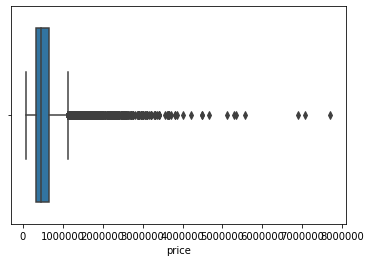

In [45]:
# Create boxplot to see what outliers there may be
sns.boxplot(x=kc_df['price'])

In [46]:
from scipy import stats

xbar = np.mean(kc_df.price)
u = np.std(kc_df.price)

In [47]:
#using z-scores to determine outliers
#threshold of 3 standard deviations (95th percentile)

threshold = 3
outlier = []
outlier_id = []
x=0

for i in kc_df.price: 
    z = (i-xbar)/u 
    
    if z > threshold: 
        outlier.append(i)
        outlier_id.append(kc_df['id'][x])
    x+=1
        
len(outlier)

406

In [48]:
len(outlier_id)

406

In [49]:
len(kc_df.price)

21597

In [50]:
#outliers constitute less than 1% of the dataset
#dropping

round((len(outlier)/len(kc_df.price))*100,2)

1.88

In [51]:
index_names = kc_df[kc_df.id.isin(outlier_id)].index

In [52]:
kc_df.drop(index_names,inplace=True)
kc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


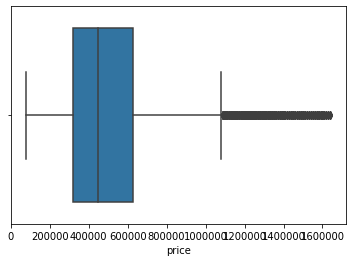

In [53]:
sns.boxplot(x=kc_df['price'])

### Bedrooms

In [54]:
kc_df['bedrooms'].value_counts()

3     9757
4     6685
2     2756
5     1492
6      252
1      196
7       32
8        9
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [55]:
#Dropping homes with 11 and 33 bedrooms.
#They only appear once in the dataset so shouldn't disrupt the model too much.
#small percentage of total rows

2/len(kc_df['bedrooms'])

9.438414346389807e-05

In [56]:
kc_df.drop(kc_df[kc_df['bedrooms'] == 33 ].index , inplace=True)
kc_df.drop(kc_df[kc_df['bedrooms'] == 11 ].index , inplace=True)
kc_df['bedrooms'].value_counts()

3     9757
4     6685
2     2756
5     1492
6      252
1      196
7       32
8        9
9        6
10       3
Name: bedrooms, dtype: int64

### Bathrooms

In [57]:
#leaving as is

kc_df['bathrooms'].value_counts()

2.50    5336
1.00    3851
1.75    3043
2.25    2025
2.00    1926
1.50    1445
2.75    1164
3.00     723
3.50     676
3.25     521
3.75     126
4.00     106
4.50      74
0.75      71
4.25      52
5.00      12
1.25       9
5.25       7
4.75       7
5.50       4
0.50       4
6.00       2
5.75       1
7.50       1
6.75       1
6.50       1
Name: bathrooms, dtype: int64

## Converting Year Columns (Relative time since/age given current year is 2020)

In [58]:
kc_df.columns

#yr_built, yr_renovated

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_sold'],
      dtype='object')

In [59]:
#Converting yr_built to new home_age column

kc_df['home_age'] = 2020 - kc_df['yr_built']
kc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,home_age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,65
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,69
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,87
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,55
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,33


In [60]:
#Converting yr_renovated to yrs_since_reno column
#Note that a value of 2020 indicates no renovation has occurred

kc_df['yrs_since_reno'] = 2020 - kc_df['yr_renovated']
kc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,home_age,yrs_since_reno
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,65,2020
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,69,29
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,87,2020
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,55,2020
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,33,2020


In [61]:
#Dropping yr_renovated and yr_built

kc_df.drop(columns=['yr_renovated'],axis=1, inplace=True)
kc_df.drop(columns=['yr_built'],axis=1, inplace=True)
kc_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,home_age,yrs_since_reno
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0,98178,47.5112,-122.257,1340,5650,2014,65,2020
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400,98125,47.7210,-122.319,1690,7639,2014,69,29
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0,98028,47.7379,-122.233,2720,8062,2015,87,2020
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910,98136,47.5208,-122.393,1360,5000,2014,55,2020
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0,98074,47.6168,-122.045,1800,7503,2015,33,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,1530,0,98103,47.6993,-122.346,1530,1509,2014,11,2020
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,2310,0,98146,47.5107,-122.362,1830,7200,2015,6,2020
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,1020,0,98144,47.5944,-122.299,1020,2007,2014,11,2020
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,1600,0,98027,47.5345,-122.069,1410,1287,2015,16,2020


## Drop ID column

In [62]:
#Dropping ID as it is not useful for this analysis

kc_df.drop(columns=['id'], inplace=True)
kc_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,home_age,yrs_since_reno
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,2014,65,2020
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,2014,69,29
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,98028,47.7379,-122.233,2720,8062,2015,87,2020
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,2014,55,2020
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,2015,33,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,2014,11,2020
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,2015,6,2020
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,2014,11,2020
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,2015,16,2020


# Exporting Cleaned Dataframe as CSV 

In [63]:
kc_df.to_csv('cleaned_df_zipcodes',index=False)